In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("PricePredictionDataset.csv")

In [3]:
df.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
df.drop(['id','name'],axis=1)

host_id      host_name neighbourhood_group       neighbourhood  \
0          2787           John            Brooklyn          Kensington   
1          2845       Jennifer           Manhattan             Midtown   
2          4632      Elisabeth           Manhattan              Harlem   
3          4869    LisaRoxanne            Brooklyn        Clinton Hill   
4          7192          Laura           Manhattan         East Harlem   
...         ...            ...                 ...                 ...   
48890   8232441        Sabrina            Brooklyn  Bedford-Stuyvesant   
48891   6570630        Marisol            Brooklyn            Bushwick   
48892  23492952  Ilgar & Aysel           Manhattan              Harlem   
48893  30985759            Taz           Manhattan      Hell's Kitchen   
48894  68119814     Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
0      40.64749  -73.97237     Private room    149               1   
1      40.75362  -73.98377  Entire home/apt    225               1   
2      40.80902  -73.94190     Private room    150               3   
3      40.68514  -73.95976  Entire home/apt     89               1   
4      40.79851  -73.94399  Entire home/apt     80              10   
...         ...        ...              ...    ...             ...   
48890  40.67853  -73.94995     Private room     70               2   
48891  40.70184  -73.93317     Private room     40               4   
48892  40.81475  -73.94867  Entire home/apt    115              10   
48893  40.75751  -73.99112      Shared room     55               1   
48894  40.76404  -73.98933     Private room     90               7   

       number_of_reviews last_review  reviews_per_month  \
0                      9  19-10-2018               0.21   
1                     45  21-05-2019               0.38   
2                      0         NaN                NaN   
3                    270  05-07-2019               4.64   
4                      9  19-11-2018               0.10   
...                  ...         ...                ...   
48890                  0         NaN                NaN   
48891                  0         NaN                NaN   
48892                  0         NaN                NaN   
48893                  0         NaN                NaN   
48894                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
4                                   1                 0  
...                               ...               ...  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23  

[48895 rows x 14 columns]

In [5]:
df.drop(['host_id','host_name','id','name'],axis=1,inplace=True)

In [6]:
df.head(5)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  19-10-2018               0.21   
1    225               1                 45  21-05-2019               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  05-07-2019               4.64   
4     80              10                  9  19-11-2018               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [7]:
df1=df.copy()

In [8]:
df1.isnull().mean()

neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [9]:
df1.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df1[feature].isnull().mean(), 4),  ' % missing values')

last_review 0.2056  % missing values
reviews_per_month 0.2056  % missing values


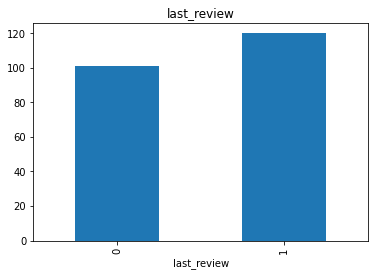

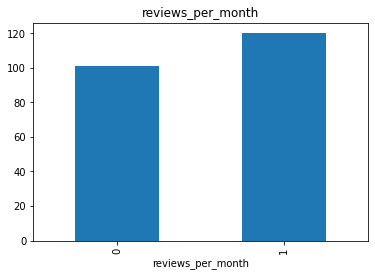

In [11]:
for feature in features_with_na:
    data = df1.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [12]:
#categorical variables
categorical=[var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [13]:
df1[categorical].head(5)

neighbourhood_group neighbourhood        room_type last_review
0            Brooklyn    Kensington     Private room  19-10-2018
1           Manhattan       Midtown  Entire home/apt  21-05-2019
2           Manhattan        Harlem     Private room         NaN
3            Brooklyn  Clinton Hill  Entire home/apt  05-07-2019
4           Manhattan   East Harlem  Entire home/apt  19-11-2018

In [14]:
df1['neighbourhood_group'].nunique()

5

In [15]:
df1['neighbourhood'].nunique()

221

In [16]:
df1['room_type'].nunique()

3

In [17]:
#numerical variables
numerical=[var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
df1[numerical].head(5)

There are 8 numerical variables


latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [18]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete=[var for var in numerical if len(df1[var].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete)))
df1[discrete].head(5)

Discrete Variables Count: 0


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [19]:
continuous=[var for var in numerical if var not in discrete and var not in['price']]
print("Continuous feature Count {}".format(len(continuous)))
continuous
df1[continuous].head(5)

Continuous feature Count 7


latitude  longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0  40.64749  -73.97237               1                  9               0.21   
1  40.75362  -73.98377               1                 45               0.38   
2  40.80902  -73.94190               3                  0                NaN   
3  40.68514  -73.95976               1                270               4.64   
4  40.79851  -73.94399              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

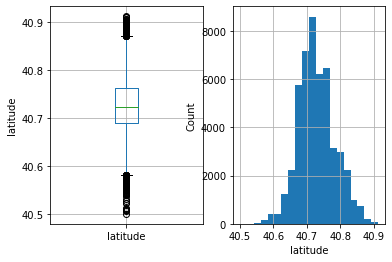

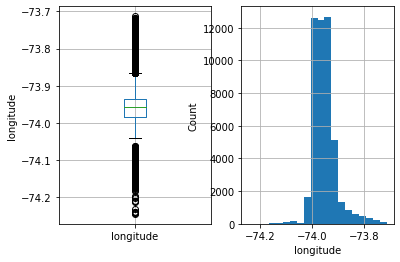

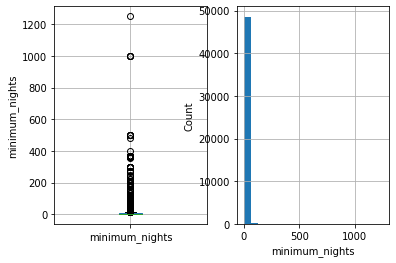

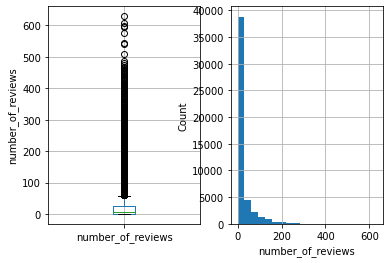

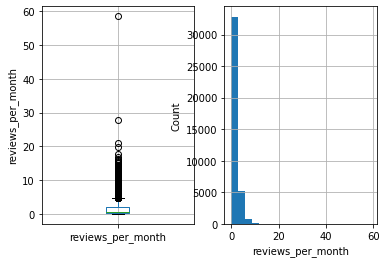

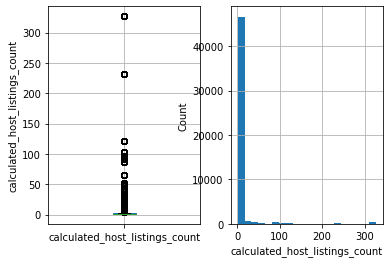

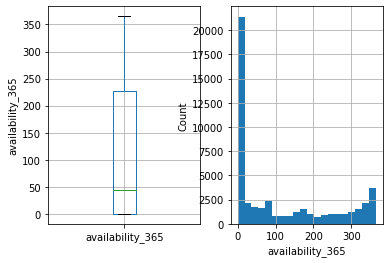

In [20]:
for var in continuous:
    plt.figure(figsize=(6,4))
    plt.subplot(1,2,1)
    fig=df1.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1,2,2)
    fig=df1[var].hist(bins=20)
    fig.set_ylabel('Count')
    fig.set_xlabel(var)
    plt.show()
    

In [21]:
df1['year'] = pd.DatetimeIndex(df['last_review']).year
df1['month'] = pd.DatetimeIndex(df['last_review']).month
df1['day'] = pd.DatetimeIndex(df['last_review']).day
df1.head(5)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  19-10-2018               0.21   
1    225               1                 45  21-05-2019               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  05-07-2019               4.64   
4     80              10                  9  19-11-2018               0.10   

   calculated_host_listings_count  availability_365    year  month   day  
0                               6               365  2018.0   10.0  19.0  
1                               2               355  2019.0    5.0  21.0  
2                               1               365     NaN    NaN   NaN  
3                               1               194  2019.0    5.0   7.0  
4                               1                 0  2018.0   11.0  19.0

In [22]:
df1['week_day'] = pd.DatetimeIndex(df['last_review']).dayofweek
df1.head(5)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  19-10-2018               0.21   
1    225               1                 45  21-05-2019               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  05-07-2019               4.64   
4     80              10                  9  19-11-2018               0.10   

   calculated_host_listings_count  availability_365    year  month   day  \
0                               6               365  2018.0   10.0  19.0   
1                               2               355  2019.0    5.0  21.0   
2                               1               365     NaN    NaN   NaN   
3                               1               194  2019.0    5.0   7.0   
4                               1                 0  2018.0   11.0  19.0   

   week_day  
0       4.0  
1       1.0  
2       NaN  
3       1.0  
4       0.0

Text(0.5, 1.0, 'Price Prediction by Year')

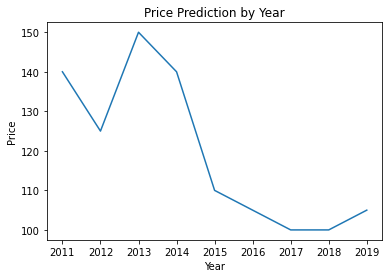

In [23]:
df1.groupby('year')['price'].median().plot()
plt.xlabel('Year')
plt.ylabel('Price')
plt.title("Price Prediction by Year")

Text(0.5, 1.0, 'Price Prediction by Month')

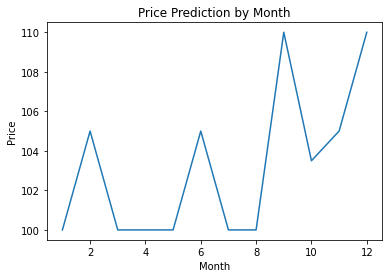

In [24]:
df1.groupby('month')['price'].median().plot()
plt.xlabel('Month')
plt.ylabel('Price')
plt.title("Price Prediction by Month")

Text(0.5, 1.0, 'Price Prediction by Day')

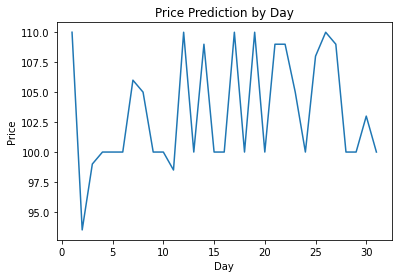

In [25]:
df1.groupby('day')['price'].median().plot()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title("Price Prediction by Day")

Text(0.5, 1.0, 'Price Prediction by WeekDay')

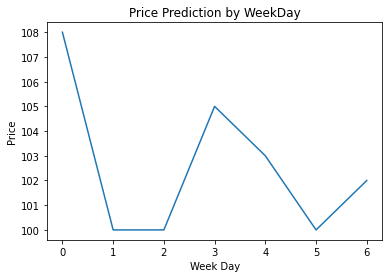

In [26]:
df1.groupby('week_day')['price'].median().plot()
plt.xlabel('Week Day')
plt.ylabel('Price')
plt.title("Price Prediction by WeekDay")

Text(0.5, 1.0, 'Price Prediction by latitude')

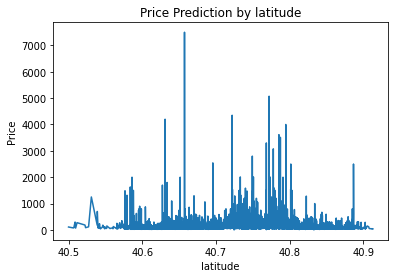

In [27]:
df1.groupby('latitude')['price'].median().plot()
plt.xlabel('latitude')
plt.ylabel('Price')
plt.title("Price Prediction by latitude")

Text(0.5, 1.0, 'Price Prediction by longitude')

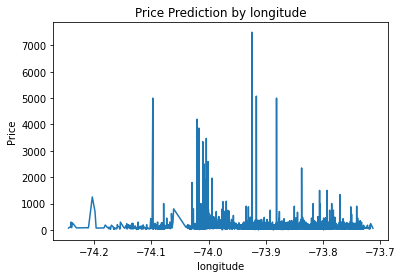

In [28]:
df1.groupby('longitude')['price'].median().plot()
plt.xlabel('longitude')
plt.ylabel('Price')
plt.title("Price Prediction by longitude")

In [29]:
df1.drop(['last_review'],axis=1)

neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149               1                  9   
1      Entire home/apt    225               1                 45   
2         Private room    150               3                  0   
3      Entire home/apt     89               1                270   
4      Entire home/apt     80              10                  9   
...                ...    ...             ...                ...   
48890     Private room     70               2                  0   
48891     Private room     40               4                  0   
48892  Entire home/apt    115              10                  0   
48893      Shared room     55               1                  0   
48894     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

         year  month   day  week_day  
0      2018.0   10.0  19.0       4.0  
1      2019.0    5.0  21.0       1.0  
2         NaN    NaN   NaN       NaN  
3      2019.0    5.0   7.0       1.0  
4      2018.0   11.0  19.0       0.0  
...       ...    ...   ...       ...  
48890     NaN    NaN   NaN       NaN  
48891     NaN    NaN   NaN       NaN  
48892     NaN    NaN   NaN       NaN  
48893     NaN    NaN   NaN       NaN  
48894     NaN    NaN   NaN       NaN  

[48895 rows x 15 columns]

Median Imputaion for NAN Values

In [30]:
df2=df1.copy()
df2

neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  19-10-2018   
1      Entire home/apt    225               1                 45  21-05-2019   
2         Private room    150               3                  0         NaN   
3      Entire home/apt     89               1                270  05-07-2019   
4      Entire home/apt     80              10                  9  19-11-2018   
...                ...    ...             ...                ...         ...   
48890     Private room     70               2                  0         NaN   
48891     Private room     40               4                  0         NaN   
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

         year  month   day  week_day  
0      2018.0   10.0  19.0       4.0  
1      2019.0    5.0  21.0       1.0  
2         NaN    NaN   NaN       NaN  
3      2019.0    5.0   7.0       1.0  
4      2018.0   11.0  19.0       0.0  
...       ...    ...   ...       ...  
48890     NaN    NaN   NaN       NaN  
48891     NaN    NaN   NaN       NaN  
48892     NaN    NaN   NaN       NaN  
48893     NaN    NaN   NaN       NaN  
48894     NaN    NaN   NaN       NaN  

[48895 rows x 16 columns]

In [31]:
df2['med_year']=df2['year'].fillna(df2['year'].median())
df2['med_mon']=df2['month'].fillna(df2['month'].median())
df2['med_day']=df2['day'].fillna(df2['day'].median())
df2['med_week']=df2['week_day'].fillna(df2['week_day'].median())
df2['med_reviews_per_month']=df2['reviews_per_month'].fillna(df2['reviews_per_month'].median())

In [32]:
df2.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  19-10-2018               0.21   
1    225               1                 45  21-05-2019               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  05-07-2019               4.64   
4     80              10                  9  19-11-2018               0.10   

   ...  availability_365    year  month   day  week_day  med_year  med_mon  \
0  ...               365  2018.0   10.0  19.0       4.0    2018.0     10.0   
1  ...               355  2019.0    5.0  21.0       1.0    2019.0      5.0   
2  ...               365     NaN    NaN   NaN       NaN    2019.0      6.0   
3  ...               194  2019.0    5.0   7.0       1.0    2019.0      5.0   
4  ...                 0  2018.0   11.0  19.0       0.0    2018.0     11.0   

   med_day  med_week  med_reviews_per_month  
0     19.0       4.0                   0.21  
1     21.0       1.0                   0.38  
2     17.0       3.0                   0.72  
3      7.0       1.0                   4.64  
4     19.0       0.0                   0.10  

[5 rows x 21 columns]

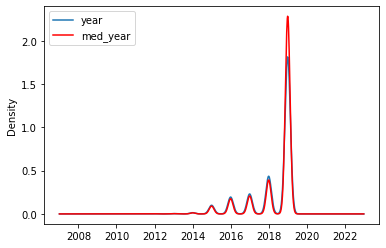

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2['year'].plot(kind='kde', ax=ax)
df2['med_year'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

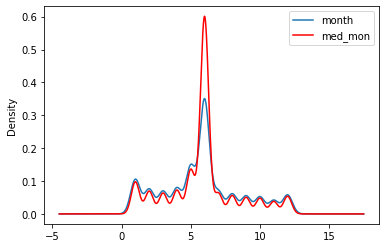

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2['month'].plot(kind='kde', ax=ax)
df2['med_mon'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

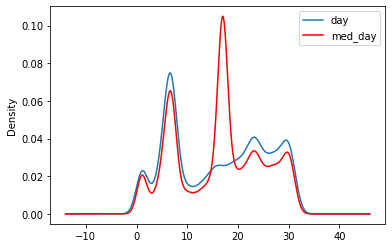

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2['day'].plot(kind='kde', ax=ax)
df2['med_day'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

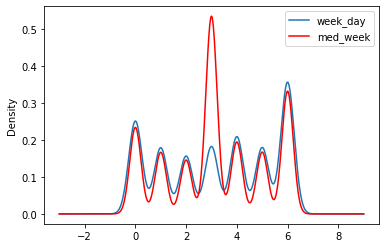

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2['week_day'].plot(kind='kde', ax=ax)
df2['med_week'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

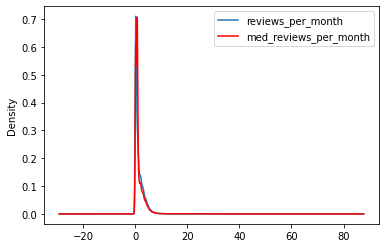

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2['reviews_per_month'].plot(kind='kde', ax=ax)
df2['med_reviews_per_month'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

MEAN Imputation for NAN Values

In [38]:
df3=df1.copy()

In [39]:
df3['me_year']=df3['year'].fillna(df3['year'].mean())
df3['me_mon']=df3['month'].fillna(df3['month'].mean())
df3['me_day']=df3['day'].fillna(df3['day'].mean())
df3['me_week']=df3['week_day'].fillna(df3['week_day'].mean())
df3['me_reviews_per_month']=df3['reviews_per_month'].fillna(df3['reviews_per_month'].mean())

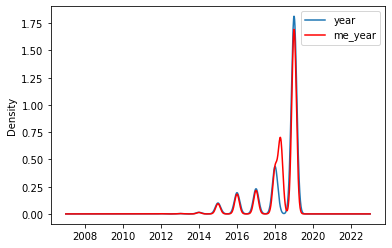

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
df3['year'].plot(kind='kde', ax=ax)
df3['me_year'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

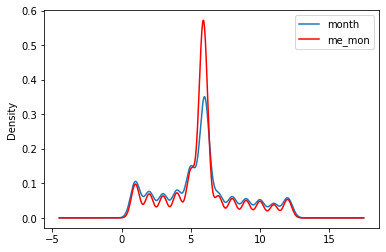

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
df3['month'].plot(kind='kde', ax=ax)
df3['me_mon'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

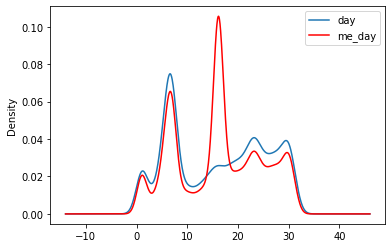

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
df3['day'].plot(kind='kde', ax=ax)
df3['me_day'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

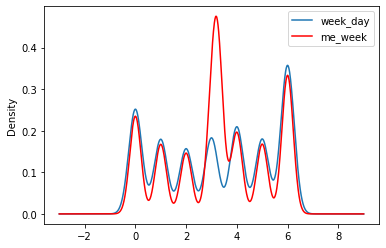

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
df3['week_day'].plot(kind='kde', ax=ax)
df3['me_week'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

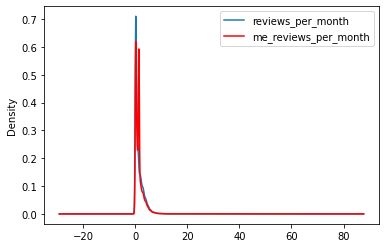

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
df3['reviews_per_month'].plot(kind='kde', ax=ax)
df3['me_reviews_per_month'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [45]:
df3.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  19-10-2018               0.21   
1    225               1                 45  21-05-2019               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  05-07-2019               4.64   
4     80              10                  9  19-11-2018               0.10   

   ...  availability_365    year  month   day  week_day      me_year  \
0  ...               365  2018.0   10.0  19.0       4.0  2018.000000   
1  ...               355  2019.0    5.0  21.0       1.0  2019.000000   
2  ...               365     NaN    NaN   NaN       NaN  2018.287722   
3  ...               194  2019.0    5.0   7.0       1.0  2019.000000   
4  ...                 0  2018.0   11.0  19.0       0.0  2018.000000   

      me_mon     me_day   me_week  me_reviews_per_month  
0  10.000000  19.000000  4.000000              0.210000  
1   5.000000  21.000000  1.000000              0.380000  
2   5.809695  16.152151  3.244059              1.373221  
3   5.000000   7.000000  1.000000              4.640000  
4  11.000000  19.000000  0.000000              0.100000  

[5 rows x 21 columns]

In [46]:
df1.drop(['last_review'],axis=1,inplace=True)

In [47]:
df1.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365    year  month   day  \
0                               6               365  2018.0   10.0  19.0   
1                               2               355  2019.0    5.0  21.0   
2                               1               365     NaN    NaN   NaN   
3                               1               194  2019.0    5.0   7.0   
4                               1                 0  2018.0   11.0  19.0   

   week_day  
0       4.0  
1       1.0  
2       NaN  
3       1.0  
4       0.0

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  year                            38843 non-null  float64
 12  month                           

In [49]:
df1.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
year                              10052
month                             10052
day                               10052
week_day                          10052
dtype: int64

In [50]:
df1.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year', 'month', 'day', 'week_day'],
      dtype='object')

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year', 'month', 'day', 'week_day'],
      dtype='object')

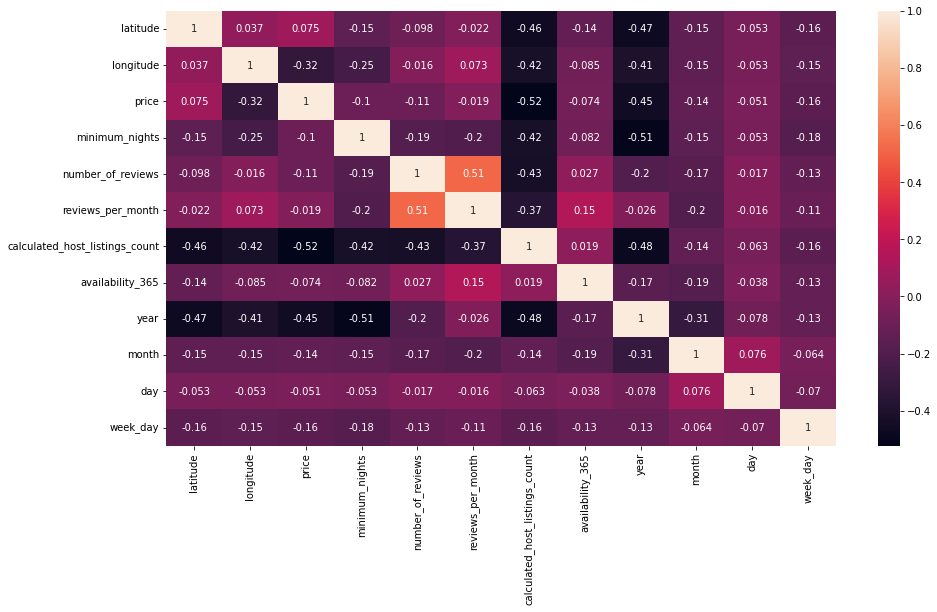

In [51]:
import seaborn as sns
corr = df1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df1.columns

In [52]:
df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

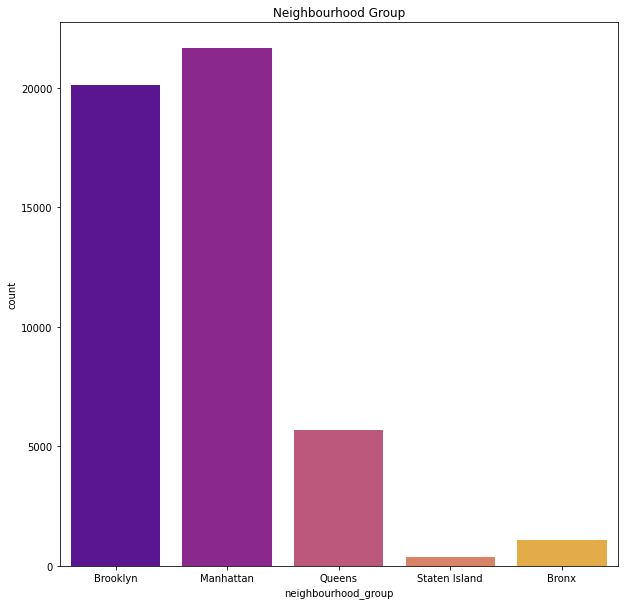

In [53]:
sns.countplot(df1['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

In [54]:
df1['neighbourhood'].nunique()

221

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood')

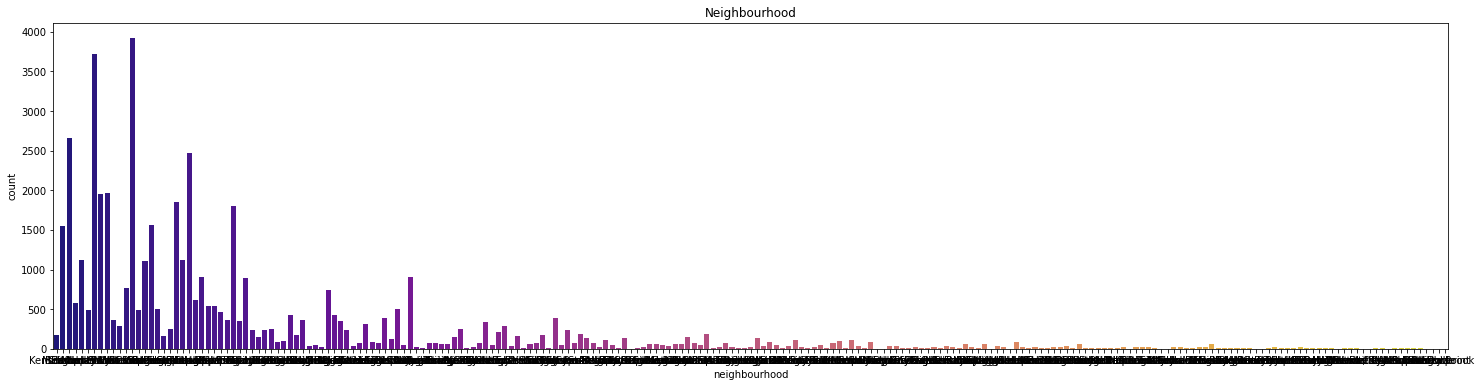

In [55]:
sns.countplot(df1['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants delivering online or Not')

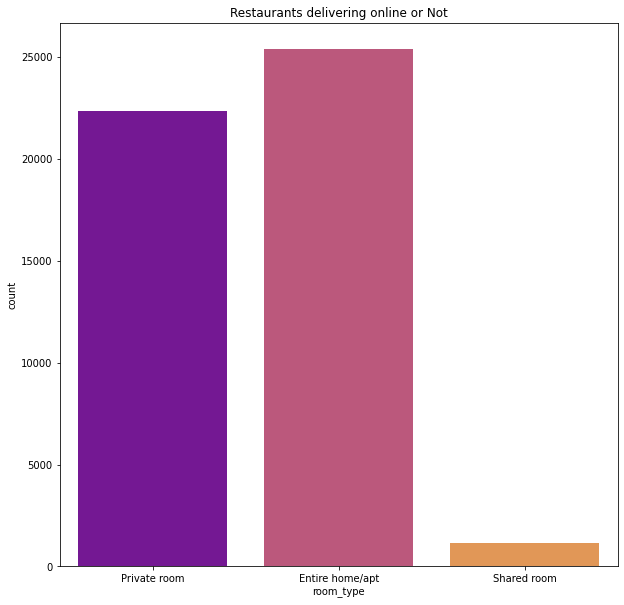

In [56]:
sns.countplot(df1['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

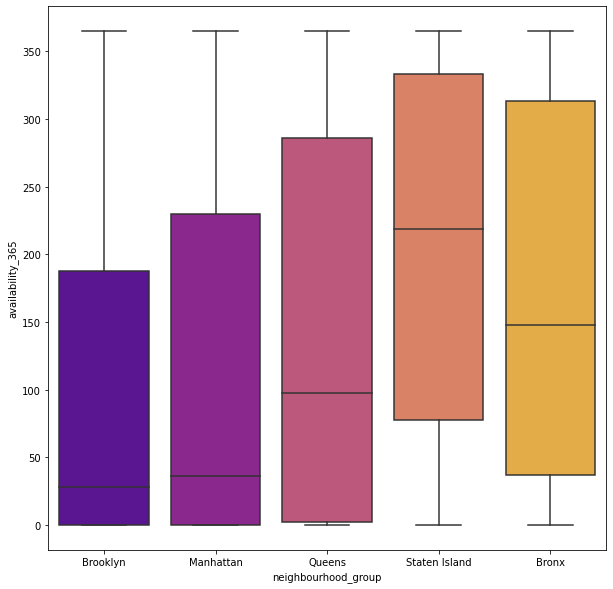

In [57]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df1, x='neighbourhood_group',y='availability_365',palette='plasma')

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


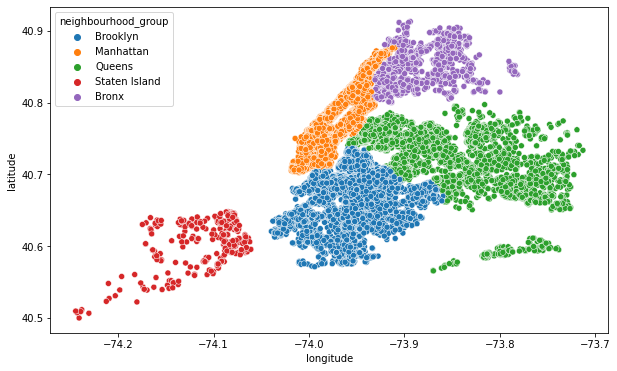

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(df1.longitude,df1.latitude,hue=df1.neighbourhood_group)
plt.ioff()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


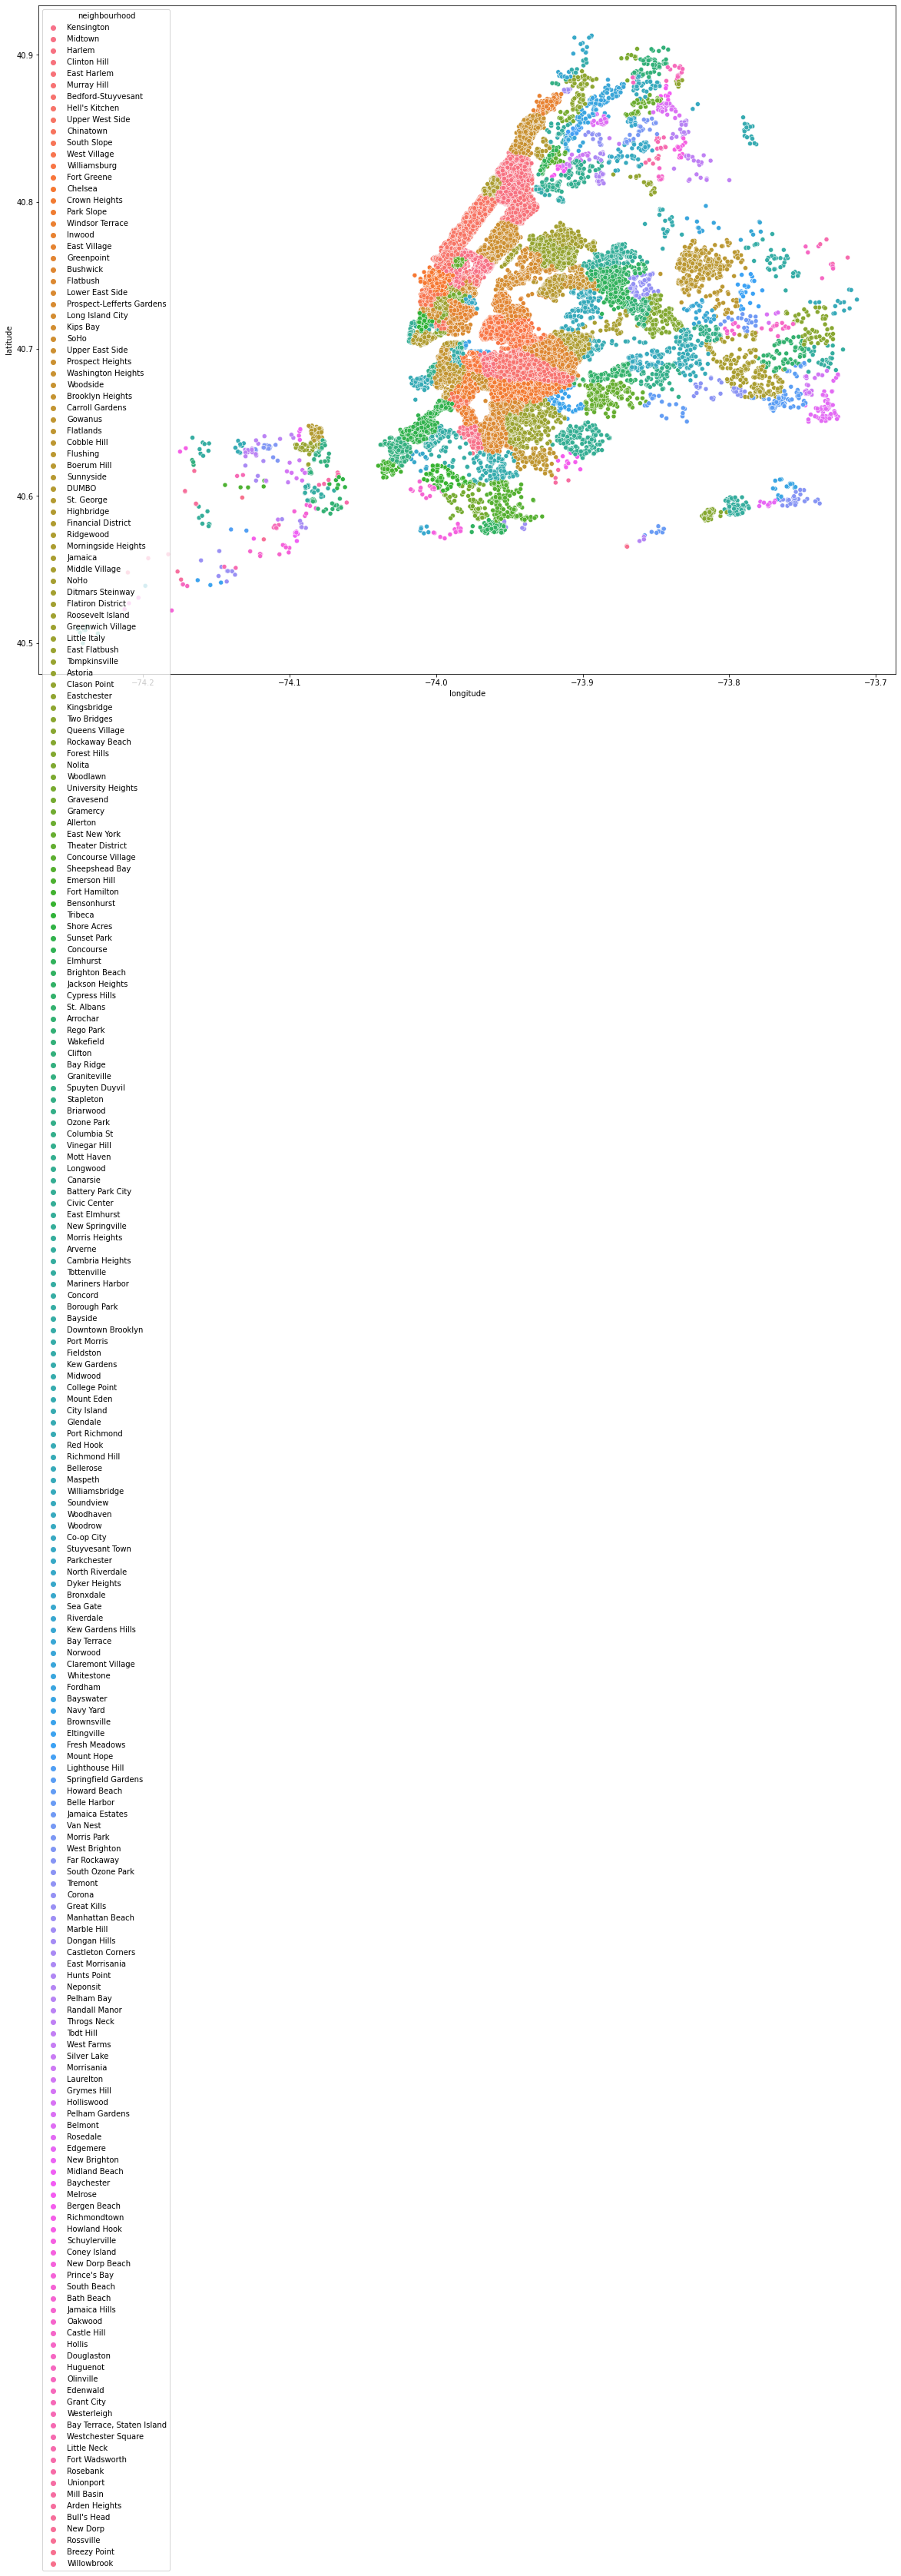

In [59]:
plt.figure(figsize=(20,16))
sns.scatterplot(df1.longitude,df1.latitude,hue=df1.neighbourhood)
plt.ioff()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


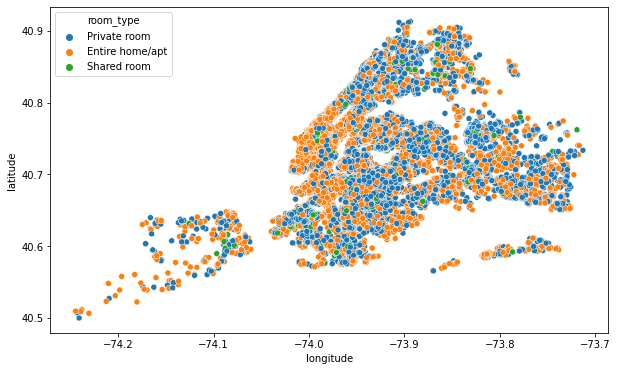

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(df1.longitude,df1.latitude,hue=df1.room_type)
plt.ioff()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


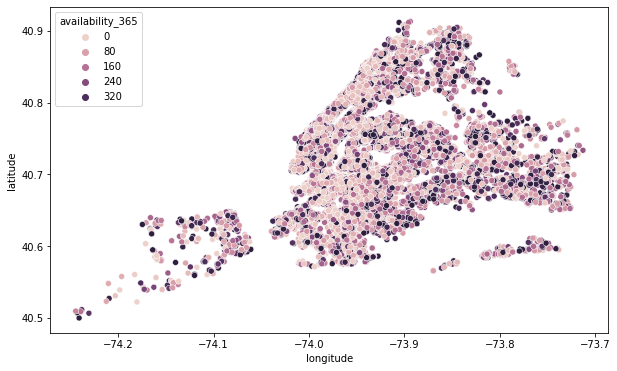

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(df1.longitude,df1.latitude,hue=df1.availability_365)
plt.ioff()

In [62]:
df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [63]:
df2=df1.copy()

In [64]:
df2 = df2[df2.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
df2.head(5)

neighbourhood  price
0           Kensington    149
3         Clinton Hill     89
6   Bedford-Stuyvesant     60
12         South Slope     89
15        Williamsburg    140

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


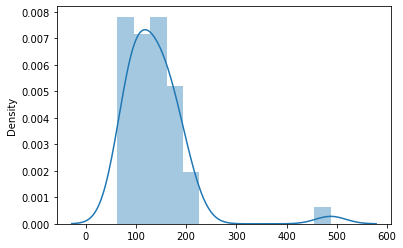

In [65]:
df2 = df1[df1.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df2.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


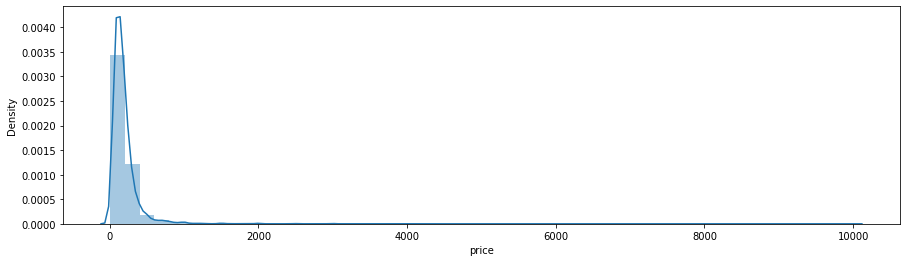

In [66]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df1[df1.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df2)
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


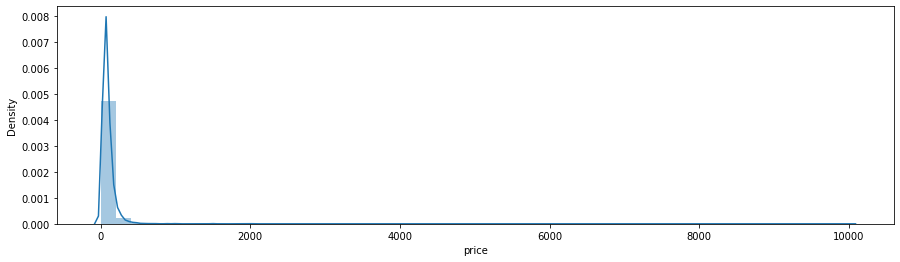

In [67]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df1[df1.neighbourhood_group=="Queens"]['price']
sns.distplot(df2)
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


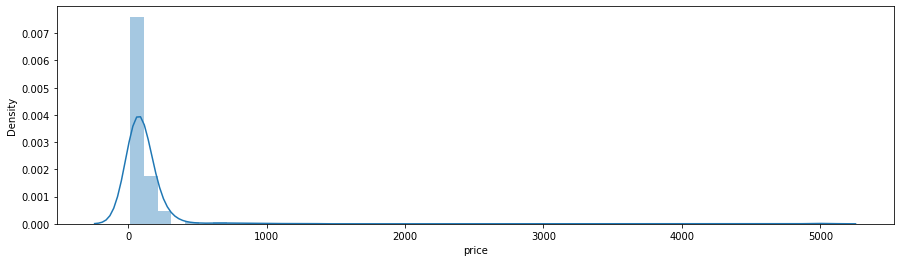

In [68]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df1[df1.neighbourhood_group=="Staten Island"]['price']
sns.distplot(df2)
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


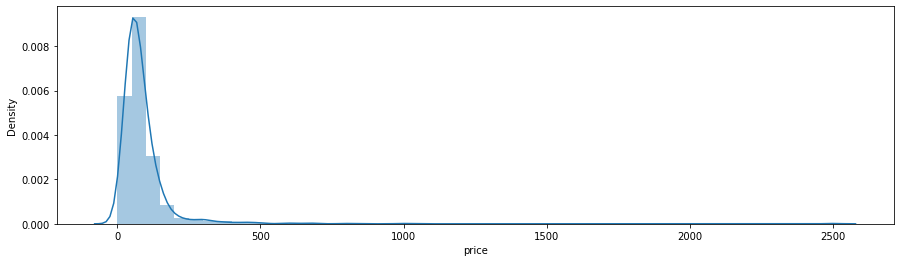

In [69]:
f,ax = plt.subplots(figsize=(15,4))
df2 = df1[df1.neighbourhood_group=="Bronx"]['price']
sns.distplot(df2)
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


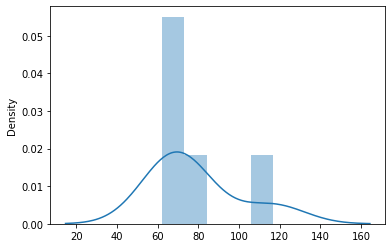

In [70]:
df2 = df1[df.room_type == "Private room"][["neighbourhood_group","price"]]
d = df2.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

In [71]:
df2.head(5)

neighbourhood_group  price
0            Brooklyn    149
2           Manhattan    150
6            Brooklyn     60
7           Manhattan     79
8           Manhattan     79

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


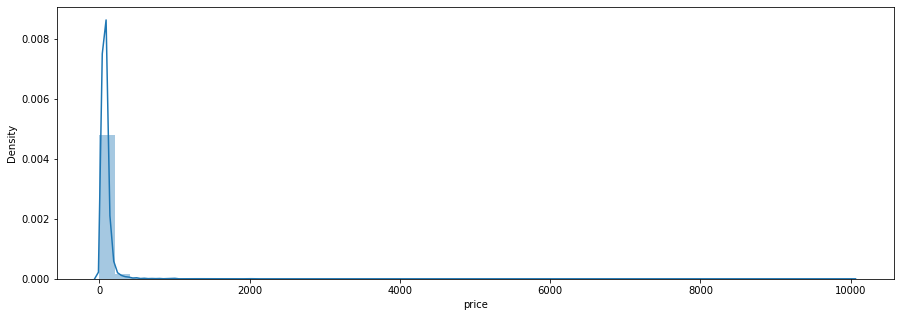

In [72]:
df2 = df1[df1.room_type=='Private room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df2)
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


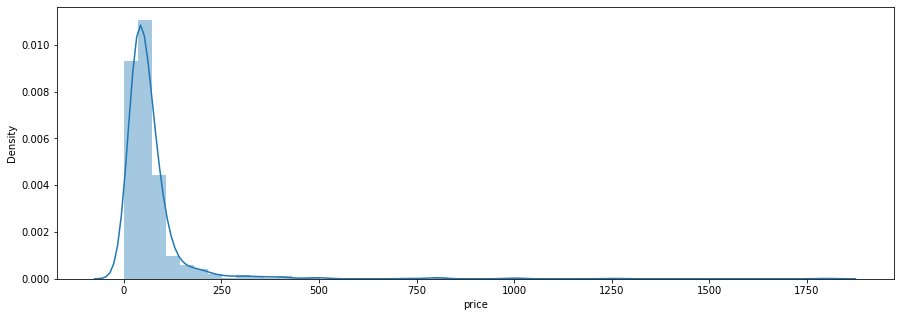

In [73]:
df2 = df1[df1.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df2)
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


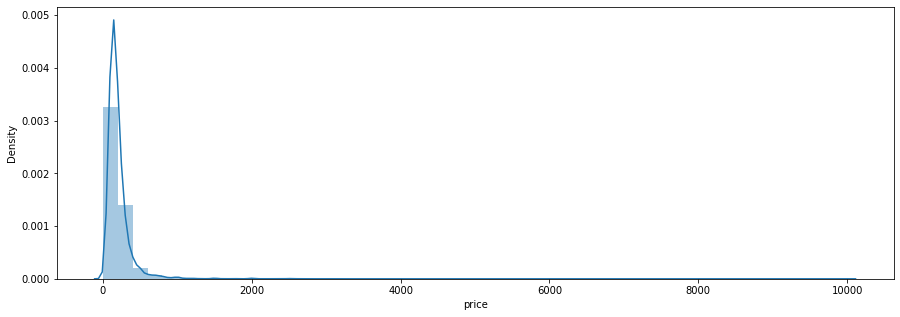

In [74]:
df2 = df1[df1.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df2)
plt.show()

In [75]:
df1.head(5)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365    year  month   day  \
0                               6               365  2018.0   10.0  19.0   
1                               2               355  2019.0    5.0  21.0   
2                               1               365     NaN    NaN   NaN   
3                               1               194  2019.0    5.0   7.0   
4                               1                 0  2018.0   11.0  19.0   

   week_day  
0       4.0  
1       1.0  
2       NaN  
3       1.0  
4       0.0

In [76]:
df1.shape

(48895, 15)

In [77]:
df1.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
year                              10052
month                             10052
day                               10052
week_day                          10052
dtype: int64

In [78]:
df1.drop(['year','month','day','week_day'],axis=1,inplace=True)

In [79]:
df1.head(5)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [80]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer = imputer.fit(df1[['reviews_per_month']])
df1[['reviews_per_month']]=imputer.transform((df1[['reviews_per_month']]))                                     

In [81]:
df1.head(5)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.72   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [82]:
df1.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [83]:
df1.shape

(48895, 11)

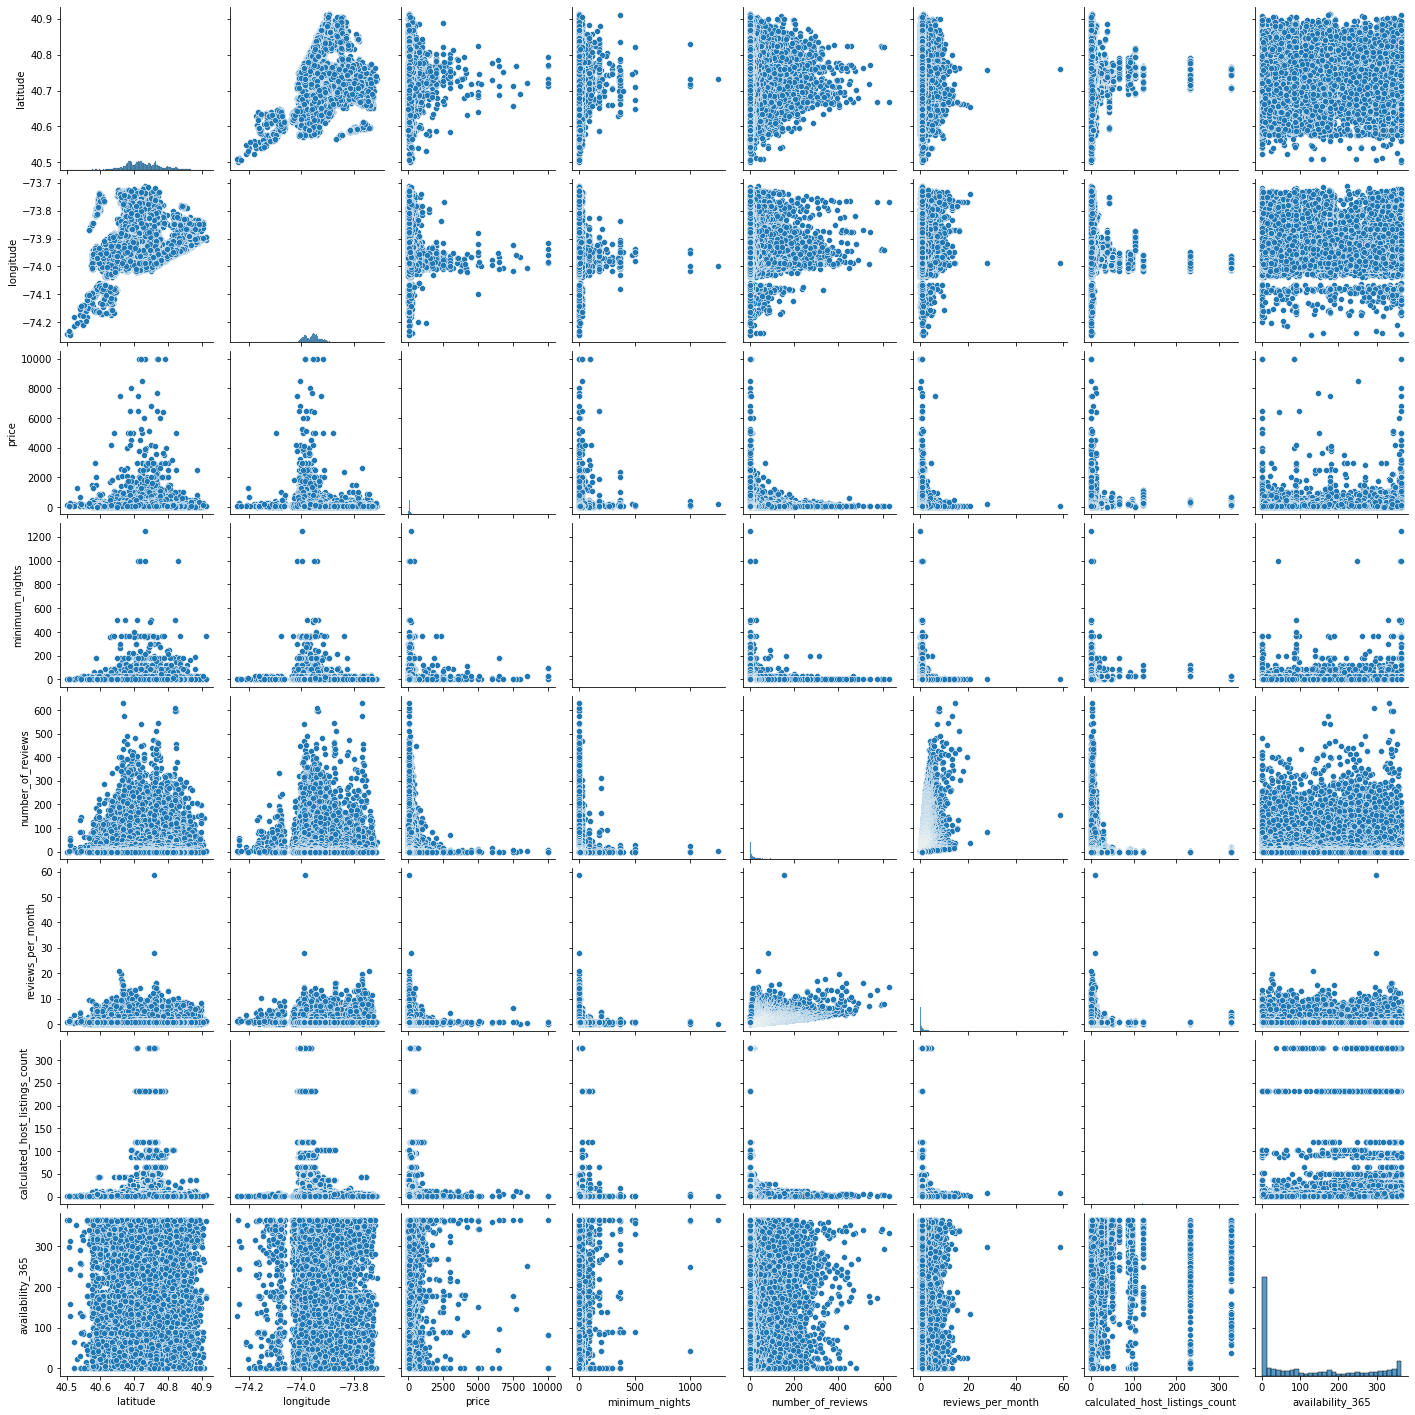

In [84]:
sns.pairplot(df1)

In [85]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

latitude                            0.073015
longitude                           0.046795
price                             106.000000
minimum_nights                      4.000000
number_of_reviews                  23.000000
reviews_per_month                   1.300000
calculated_host_listings_count      1.000000
availability_365                  227.000000
dtype: float64


In [86]:
df1= df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q1 + 1.5 * IQR))).any(axis=1)]
print(df1.shape)

(16130, 11)


C:\Users\899164\AppData\Local\Temp\1\ipykernel_16960\4227826227.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1= df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q1 + 1.5 * IQR))).any(axis=1)]


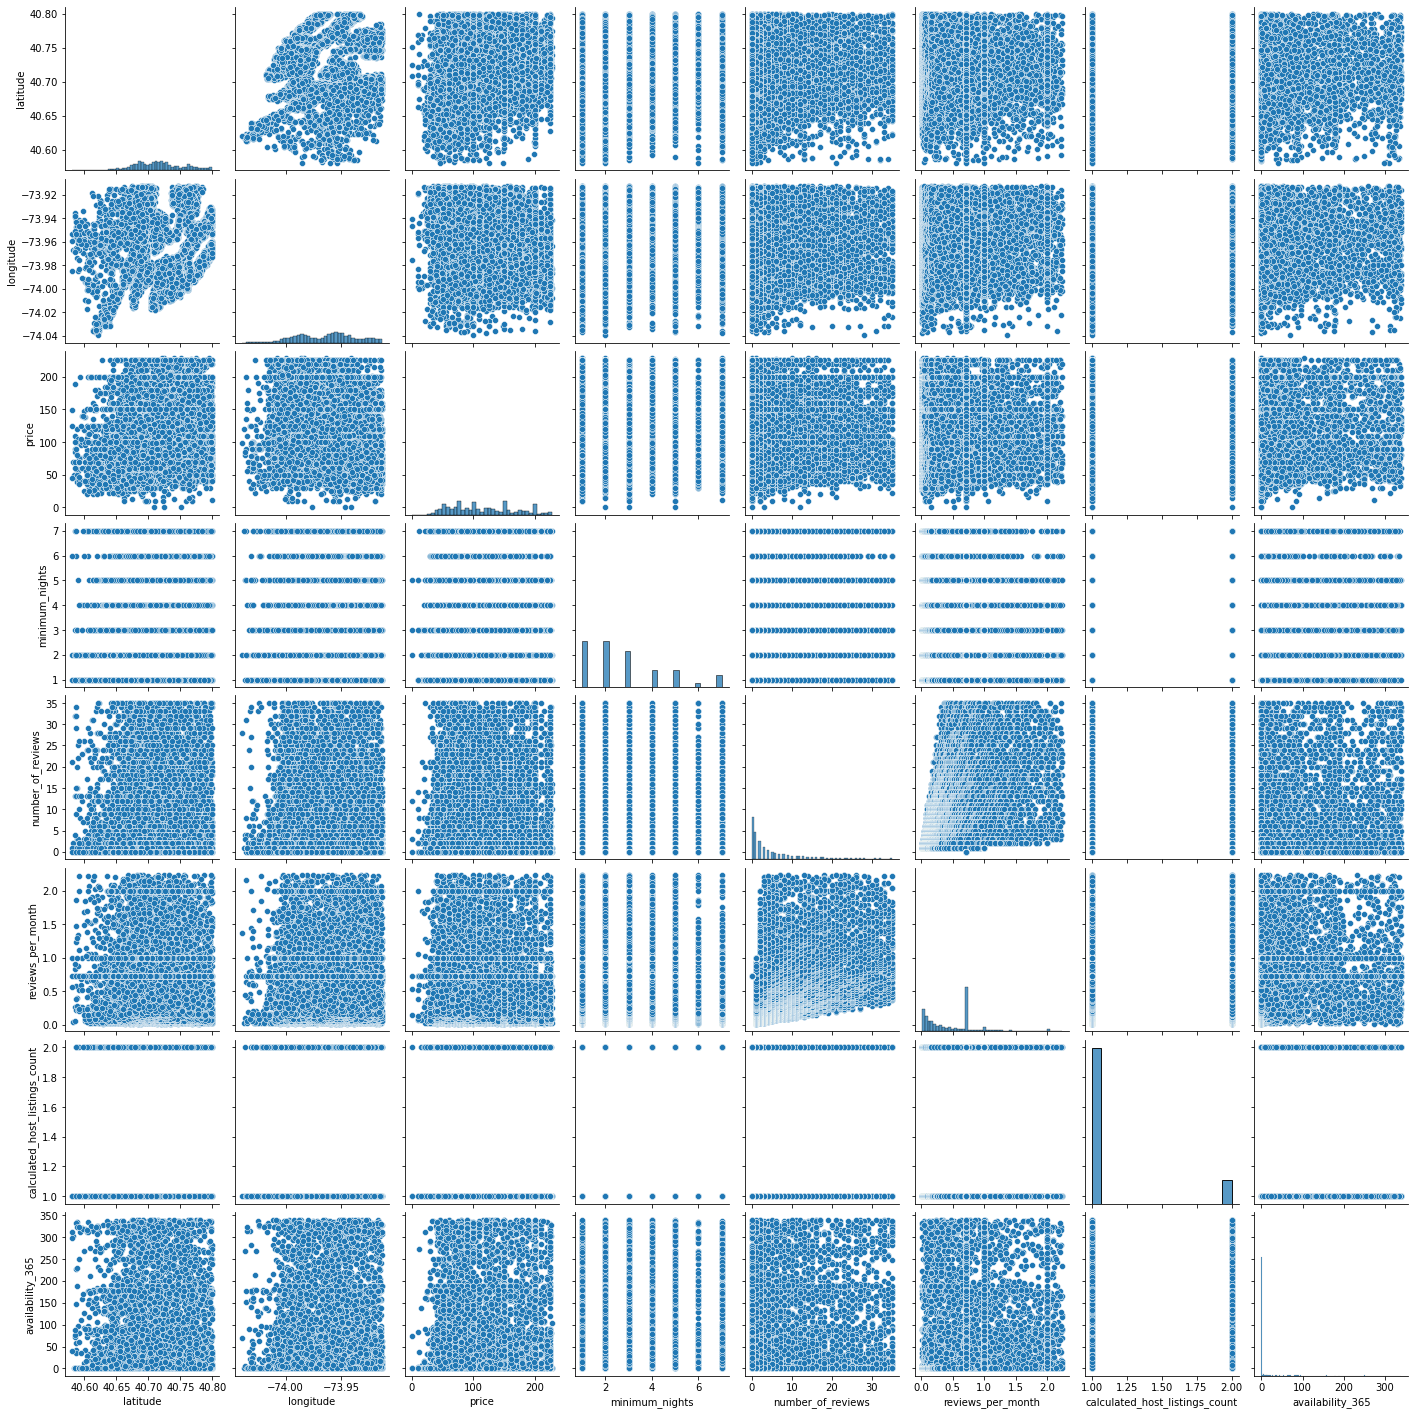

In [87]:
sns.pairplot(df1)

In [88]:
df1.head(5)

neighbourhood_group       neighbourhood  latitude  longitude  \
19           Manhattan         East Harlem  40.79685  -73.94872   
25            Brooklyn     Windsor Terrace  40.65599  -73.97519   
42            Brooklyn         Fort Greene  40.69673  -73.97584   
48            Brooklyn  Bedford-Stuyvesant  40.68554  -73.94090   
54           Manhattan            Kips Bay  40.73961  -73.98074   

          room_type  price  minimum_nights  number_of_reviews  \
19  Entire home/apt    190               7                  0   
25     Private room     60               1                 19   
42     Private room    120               7                 25   
48  Entire home/apt    115               3                 11   
54  Entire home/apt    200               7                 19   

    reviews_per_month  calculated_host_listings_count  availability_365  
19               0.72                               2               249  
25               1.37                               2                85  
42               0.23                               1               311  
48               0.10                               1                 0  
54               0.22                               1               257

<AxesSubplot:>

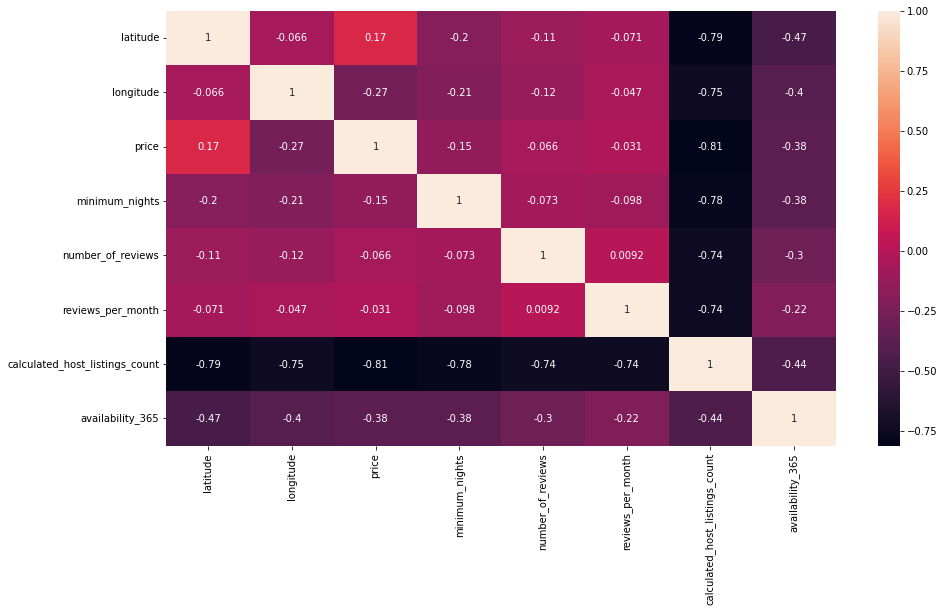

In [89]:
corr = df1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [90]:
df1.drop(['latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
df1.head(5)

c:\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


neighbourhood_group        room_type  price  minimum_nights  \
19           Manhattan  Entire home/apt    190               7   
25            Brooklyn     Private room     60               1   
42            Brooklyn     Private room    120               7   
48            Brooklyn  Entire home/apt    115               3   
54           Manhattan  Entire home/apt    200               7   

    calculated_host_listings_count  availability_365  
19                               2               249  
25                               2                85  
42                               1               311  
48                               1                 0  
54                               1               257

In [91]:
y=df1['price']
y

19       190
25        60
42       120
48       115
54       200
        ... 
48886    200
48888    125
48890     70
48891     40
48894     90
Name: price, Length: 16130, dtype: int64

In [92]:
X_new=df1.copy()

In [93]:
X_new.drop(['price'],axis=1,inplace=True)

In [94]:
X_new.head(5)

neighbourhood_group        room_type  minimum_nights  \
19           Manhattan  Entire home/apt               7   
25            Brooklyn     Private room               1   
42            Brooklyn     Private room               7   
48            Brooklyn  Entire home/apt               3   
54           Manhattan  Entire home/apt               7   

    calculated_host_listings_count  availability_365  
19                               2               249  
25                               2                85  
42                               1               311  
48                               1                 0  
54                               1               257

In [95]:
X_new.shape

(16130, 5)

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('enc', OneHotEncoder(),[0,1])],remainder='passthrough')
X1_new=ct.fit_transform(X_new)

In [97]:
X1_new

array([[  0.,   1.,   0., ...,   7.,   2., 249.],
       [  1.,   0.,   0., ...,   1.,   2.,  85.],
       [  1.,   0.,   0., ...,   7.,   1., 311.],
       ...,
       [  1.,   0.,   0., ...,   2.,   2.,   9.],
       [  1.,   0.,   0., ...,   4.,   2.,  36.],
       [  0.,   1.,   0., ...,   7.,   1.,  23.]])

In [98]:
X1=pd.DataFrame(X1_new).head()
X1

0    1    2    3    4    5    6    7      8
0  0.0  1.0  0.0  1.0  0.0  0.0  7.0  2.0  249.0
1  1.0  0.0  0.0  0.0  1.0  0.0  1.0  2.0   85.0
2  1.0  0.0  0.0  0.0  1.0  0.0  7.0  1.0  311.0
3  1.0  0.0  0.0  1.0  0.0  0.0  3.0  1.0    0.0
4  0.0  1.0  0.0  1.0  0.0  0.0  7.0  1.0  257.0

In [99]:
X1_new.shape

(16130, 9)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_new,y, test_size=0.2, random_state=0)

In [101]:
X_train.shape

(12904, 9)

In [102]:
y_train.shape

(12904,)

In [103]:
X_test.shape

(3226, 9)

In [104]:
y_test.shape

(3226,)

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lr=LinearRegression()

In [108]:
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lr',LinearRegression())
])

In [109]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [110]:
lr_pred=pipe.predict(X_test)

In [111]:
pd.DataFrame({'original test set':y_test, 'predictions': lr_pred})

original test set  predictions
25936                175   161.994295
19991                110   160.580671
38342                220   170.648174
40358                140   150.178407
28374                 53    63.458417
...                  ...          ...
40397                 60    68.666944
35867                 60    67.364820
39166                150   163.493986
4336                  42    63.458417
7376                 151   155.372175

[3226 rows x 2 columns]

In [112]:
from sklearn import metrics
print('r2:', np.sqrt(metrics.r2_score(y_test, lr_pred)))

r2: 0.6935065199731555


In [113]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

RMSE: 36.948583129648235


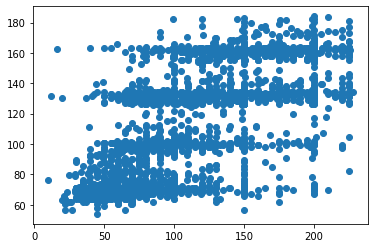

In [114]:
plt.scatter(y_test,lr_pred)

In [115]:
from sklearn.model_selection import cross_val_score
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.5067866  0.50830906 0.44988966 0.46826831 0.50293702 0.48973936
 0.48903692 0.481023   0.50300697 0.52248516]
Mean of all scores:  0.492148206616123


<AxesSubplot:title={'center':'LinearRegression'}, xlabel='Training examples', ylabel='Score'>

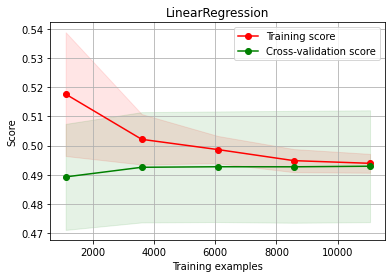

In [124]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='LinearRegression')

In [129]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lass',Lasso(alpha=1.0))
])

In [130]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lass', Lasso())])

In [131]:
lasso_pred=pipe.predict(X_test)

In [132]:
pd.DataFrame({'original test set':y_test, 'predictions': lasso_pred})

original test set  predictions
25936                175   161.011672
19991                110   159.146408
38342                220   167.597824
40358                140   145.441238
28374                 53    68.322481
...                  ...          ...
40397                 60    70.707667
35867                 60    70.111370
39166                150   160.574221
4336                  42    68.322481
7376                 151   156.761222

[3226 rows x 2 columns]

In [133]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))

r2: 0.6924952798760861


In [134]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE: 36.99843539207598


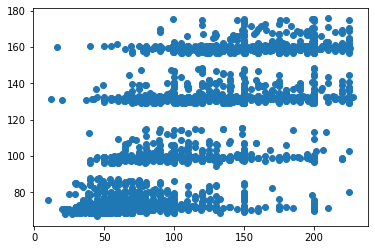

In [135]:
plt.scatter(y_test,lasso_pred)

In [136]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.50313424 0.50496641 0.44877759 0.46965374 0.50318546 0.48452646
 0.49040976 0.48020481 0.4997517  0.51642004]
Mean of all scores:  0.49010302098218717


<AxesSubplot:title={'center':'Lasso'}, xlabel='Training examples', ylabel='Score'>

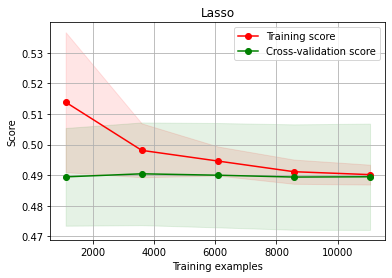

In [137]:
skplt.estimators.plot_learning_curve(lass,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso')

In [138]:
import xgboost as xgb

In [139]:
xg=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('xgb',xgb.XGBRegressor())
])

In [140]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [141]:
xgb_pred=pipe.predict(X_test)

In [142]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_pred})

original test set  predictions
25936                175   169.005478
19991                110   159.783264
38342                220   212.090683
40358                140   171.062881
28374                 53    58.007366
...                  ...          ...
40397                 60    67.343704
35867                 60    65.405151
39166                150   142.343048
4336                  42    58.007366
7376                 151   147.681488

[3226 rows x 2 columns]

In [143]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_pred)))

r2: 0.6775878814081232


In [144]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RMSE: 37.717426375118045


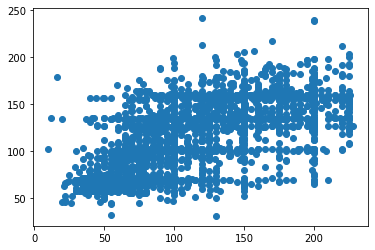

In [145]:
plt.scatter(y_test,xgb_pred)

In [146]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.48245143 0.47012702 0.44895209 0.44576854 0.46280682 0.46306143
 0.47310136 0.450727   0.47317483 0.50817989]
Mean of all scores:  0.4678350398509906


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

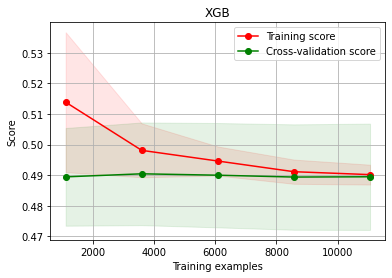

In [148]:
skplt.estimators.plot_learning_curve(xg,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

In [158]:
from sklearn.svm import SVR
sv=SVR()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('svr',SVR(kernel='rbf'))
])

In [159]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [160]:
svr_pred=pipe.predict(X_test)

In [161]:
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

original test set  predictions
25936                175   169.559953
19991                110   160.578768
38342                220   175.992923
40358                140   140.691579
28374                 53    57.439979
...                  ...          ...
40397                 60    61.661483
35867                 60    59.899938
39166                150   151.700374
4336                  42    57.439979
7376                 151   141.976815

[3226 rows x 2 columns]

In [162]:
print('r2:', np.sqrt(metrics.r2_score(y_test, svr_pred)))

r2: 0.683303386319684


In [163]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

RMSE: 37.44524192816122


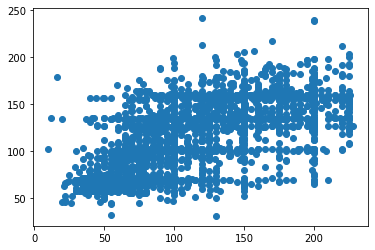

In [164]:
plt.scatter(y_test,xgb_pred)

In [165]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.50039303 0.48158961 0.45143775 0.45498192 0.48112095 0.4647839
 0.47851487 0.46781534 0.48778264 0.51204867]
Mean of all scores:  0.47804686803705093


<AxesSubplot:title={'center':'SVR'}, xlabel='Training examples', ylabel='Score'>

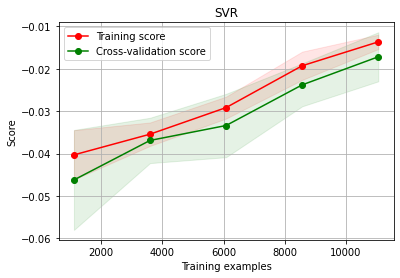

In [166]:
skplt.estimators.plot_learning_curve(sv,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='SVR')

In [167]:
from sklearn.tree import DecisionTreeRegressor

In [168]:
dtr=DecisionTreeRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('dtr',DecisionTreeRegressor())
])

In [169]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [170]:
dtr_pred=pipe.predict(X_test)

In [171]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

original test set  predictions
25936                175   199.000000
19991                110   159.646438
38342                220   148.000000
40358                140   150.000000
28374                 53    58.791411
...                  ...          ...
40397                 60    66.853591
35867                 60    65.589041
39166                150   126.666667
4336                  42    58.791411
7376                 151   148.560606

[3226 rows x 2 columns]

In [172]:
print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))

r2: 0.580624171333557


In [173]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

RMSE: 41.7551203520042


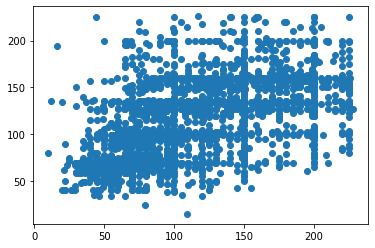

In [174]:
plt.scatter(y_test,dtr_pred)

In [175]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.3772391  0.35051943 0.29152555 0.31771673 0.34241631 0.33375771
 0.33496827 0.34865929 0.37280782 0.39330198]
Mean of all scores:  0.3462912184031709


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

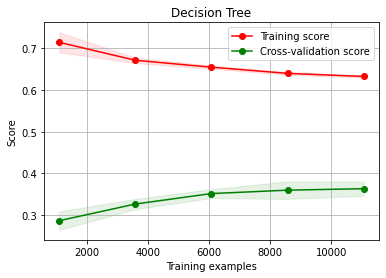

In [176]:
skplt.estimators.plot_learning_curve(dtr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Decision Tree')

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
rfr=RandomForestRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('rfr',RandomForestRegressor())
])

In [179]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

In [180]:
rfr_pred=pipe.predict(X_test)

In [181]:
pd.DataFrame({'original test set':y_test, 'predictions': rfr_pred})

original test set  predictions
25936                175   178.090000
19991                110   160.059328
38342                220   187.441667
40358                140   141.519548
28374                 53    58.453061
...                  ...          ...
40397                 60    67.018468
35867                 60    65.610546
39166                150   126.608389
4336                  42    58.453061
7376                 151   148.505949

[3226 rows x 2 columns]

In [182]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_pred)))

r2: 0.6566880725242159


In [183]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 38.67751393647398


In [184]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.46541396 0.44209349 0.41072229 0.42689836 0.44140015 0.44053712
 0.44533126 0.42846202 0.4554075  0.48759679]
Mean of all scores:  0.444386293621692


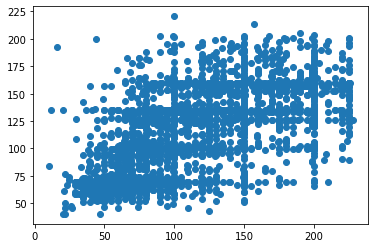

In [185]:
plt.scatter(y_test,rfr_pred)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

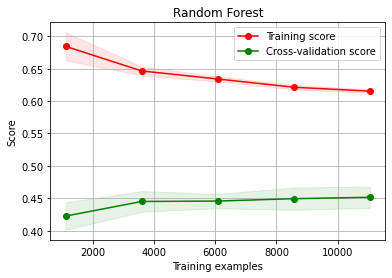

In [186]:
skplt.estimators.plot_learning_curve(rfr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

In [187]:
from sklearn.linear_model import Ridge
ridge=Ridge()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('ridge',Ridge(alpha=0.001))
])

In [188]:
pipe.fit(X_train,y_train)
rid_pred=pipe.predict(X_test)

In [189]:
pd.DataFrame({'original test set':y_test, 'predictions': rid_pred})

original test set  predictions
25936                175   162.179049
19991                110   160.763674
38342                220   170.834751
40358                140   150.215522
28374                 53    63.306729
...                  ...          ...
40397                 60    68.513417
35867                 60    67.211745
39166                150   163.676150
4336                  42    63.306729
7376                 151   155.556986

[3226 rows x 2 columns]

In [190]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rid_pred)))

r2: 0.6934738647430905


In [191]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rid_pred)))

RMSE: 36.95019516021801


In [192]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.50658063 0.5084297  0.44941433 0.46828216 0.50402028 0.48925009
 0.48943086 0.48094914 0.50290957 0.52255876]
Mean of all scores:  0.49218255252210685


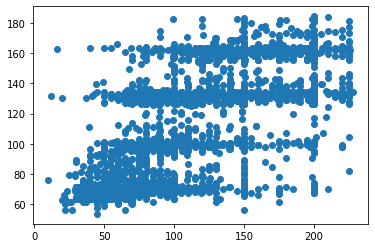

In [193]:
plt.scatter(y_test,rid_pred)

<AxesSubplot:title={'center':'Ridge'}, xlabel='Training examples', ylabel='Score'>

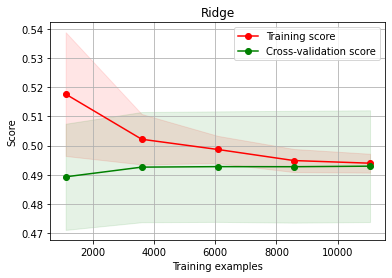

In [194]:
skplt.estimators.plot_learning_curve(ridge,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Ridge')

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
X2_new=X_new.copy()
X2_new

neighbourhood_group        room_type  minimum_nights  \
19              Manhattan  Entire home/apt               7   
25               Brooklyn     Private room               1   
42               Brooklyn     Private room               7   
48               Brooklyn  Entire home/apt               3   
54              Manhattan  Entire home/apt               7   
...                   ...              ...             ...   
48886           Manhattan  Entire home/apt               6   
48888           Manhattan     Private room               4   
48890            Brooklyn     Private room               2   
48891            Brooklyn     Private room               4   
48894           Manhattan     Private room               7   

       calculated_host_listings_count  availability_365  
19                                  2               249  
25                                  2                85  
42                                  1               311  
48                                  1                 0  
54                                  1               257  
...                               ...               ...  
48886                               1               176  
48888                               1                31  
48890                               2                 9  
48891                               2                36  
48894                               1                23  

[16130 rows x 5 columns]

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('enc', OneHotEncoder(),[0,1])],remainder='passthrough')
X3_new=ct.fit_transform(X2_new)

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3_new,y, test_size=0.2, random_state=0)

In [199]:
X3_new

array([[  0.,   1.,   0., ...,   7.,   2., 249.],
       [  1.,   0.,   0., ...,   1.,   2.,  85.],
       [  1.,   0.,   0., ...,   7.,   1., 311.],
       ...,
       [  1.,   0.,   0., ...,   2.,   2.,   9.],
       [  1.,   0.,   0., ...,   4.,   2.,  36.],
       [  0.,   1.,   0., ...,   7.,   1.,  23.]])

In [200]:
scaler = StandardScaler()
# fit and transform the data
X_train[:,6:]= scaler.fit_transform(X_train[:,6:])
X_test[:,6:]= scaler.transform(X_test[:,6:])

In [201]:
print(X_train)

[[ 1.          0.          0.         ... -0.49850249  2.54911088
  -0.45724168]
 [ 0.          1.          0.         ... -1.06585794  2.54911088
  -0.45724168]
 [ 1.          0.          0.         ...  0.06885296 -0.39229364
  -0.45724168]
 ...
 [ 0.          1.          0.         ...  1.20356387 -0.39229364
  -0.45724168]
 [ 0.          1.          0.         ... -0.49850249 -0.39229364
   1.51743296]
 [ 1.          0.          0.         ...  1.20356387 -0.39229364
  -0.45724168]]


In [202]:
print(X_test)

[[ 0.          1.          0.         ...  1.20356387 -0.39229364
   0.42189429]
 [ 0.          1.          0.         ...  0.06885296 -0.39229364
  -0.45724168]
 [ 0.          1.          0.         ...  1.20356387 -0.39229364
   2.31541793]
 ...
 [ 0.          1.          0.         ... -1.06585794 -0.39229364
  -0.38961584]
 [ 1.          0.          0.         ...  2.33827477 -0.39229364
  -0.45724168]
 [ 0.          1.          0.         ...  2.33827477 -0.39229364
  -0.45724168]]


In [203]:
rfr_model=RandomForestRegressor()

In [204]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor()

In [205]:
rfr_model_pred=rfr_model.predict(X_test)

In [206]:
pd.DataFrame({'original test set':y_test, 'predictions': rfr_model_pred})

original test set  predictions
25936                175   175.376667
19991                110   159.566581
38342                220   188.568333
40358                140   140.469667
28374                 53    58.854666
...                  ...          ...
40397                 60    66.667861
35867                 60    65.518378
39166                150   125.488095
4336                  42    58.854666
7376                 151   148.583596

[3226 rows x 2 columns]

In [207]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_model_pred)))

r2: 0.6580362326863695


In [208]:
param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, None], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf' : [1, 2, 5, 10]}

In [209]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = cv,scoring='neg_mean_squared_error', n_jobs = -1, verbose = 0, return_train_score=True)
search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [210]:
from sklearn.model_selection import learning_curve

In [211]:
lc=learning_curve(search,
        X_train,
        y_train,
        cv=5,
        n_jobs=-1)

In [212]:
plt.show(lc)

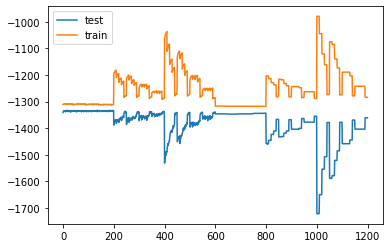

In [213]:
test_scores = search.cv_results_['mean_test_score']
train_scores = search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [214]:
print(search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 10}


In [215]:
print(search.best_score_)

-1332.509473083786


In [216]:
rfr_search=search.predict(X_test)

In [217]:
pd.DataFrame({'original test set':y_test, 'predictions': rfr_search})

original test set  predictions
25936                175   170.354738
19991                110   159.134249
38342                220   174.414089
40358                140   146.070537
28374                 53    60.231987
...                  ...          ...
40397                 60    68.627387
35867                 60    64.527235
39166                150   156.643809
4336                  42    60.231987
7376                 151   148.020351

[3226 rows x 2 columns]

In [218]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_search)))

r2: 0.6957475898315955


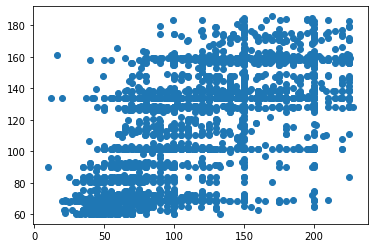

In [219]:
plt.scatter(y_test,rfr_search)

In [220]:
params = {'alpha': [1e-10,1e-6,1e-2,3,5,7,15,100,200,300,500,700]} # It will check from 1e-08 to 1e+08
lasso = Lasso()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lasso_model = GridSearchCV(lasso, params, cv = cv,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.333e+04, tolerance: 3.095e+03
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.419e+04, tolerance: 3.078e+03
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.280e+04, tolerance: 3.108e+03
  mod

{'alpha': 1e-10}
-1345.9652088912044


c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.806e+04, tolerance: 3.426e+03
  model = cd_fast.enet_coordinate_descent(


In [221]:
lass_modelpred=lasso_model.predict(X_test)

In [222]:
pd.DataFrame({'original test set':y_test, 'predictions': lass_modelpred})

original test set  predictions
25936                175   162.179050
19991                110   160.763675
38342                220   170.834753
40358                140   150.215524
28374                 53    63.306727
...                  ...          ...
40397                 60    68.513415
35867                 60    67.211743
39166                150   163.676152
4336                  42    63.306727
7376                 151   155.556987

[3226 rows x 2 columns]

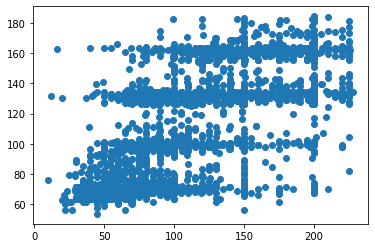

In [223]:
plt.scatter(y_test,lass_modelpred)

In [224]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lass_modelpred)))

r2: 0.6934738639815035


In [225]:
lasso_model.best_params_

{'alpha': 1e-10}

In [226]:
lasso_model.best_score_

-1345.9652088912044

In [227]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[18:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [228]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-1340.3582974242993
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [229]:
xgb_gridpred=xgb_grid.predict(X_test)

In [230]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_gridpred})

original test set  predictions
25936                175   169.727051
19991                110   160.357162
38342                220   187.256683
40358                140   150.038620
28374                 53    57.972889
...                  ...          ...
40397                 60    67.114037
35867                 60    65.559250
39166                150   149.830841
4336                  42    57.972889
7376                 151   148.036865

[3226 rows x 2 columns]

In [231]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_gridpred)))

r2: 0.6937114936796687


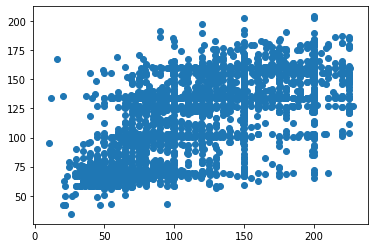

In [232]:
plt.scatter(y_test,xgb_gridpred)

In [233]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
clf = GridSearchCV(svr, parameters,cv=cv,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)
clf.best_score_
clf.best_params_

{'C': 1.5, 'epsilon': 0.3, 'gamma': 1e-07, 'kernel': 'linear'}

In [234]:
svr_pred=clf.predict(X_test)

In [235]:
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

original test set  predictions
25936                175   160.593363
19991                110   158.839762
38342                220   170.077911
40358                140   147.190003
28374                 53    56.324984
...                  ...          ...
40397                 60    61.624863
35867                 60    60.299893
39166                150   161.828435
4336                  42    56.324984
7376                 151   153.539884

[3226 rows x 2 columns]

In [236]:
print('r2:', np.sqrt(metrics.r2_score(y_test, svr_pred)))

r2: 0.68545488931558


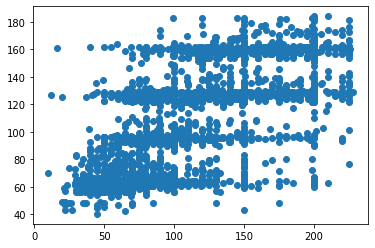

In [237]:
plt.scatter(y_test,svr_pred)

In [238]:
param_grid = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


dtm=DecisionTreeRegressor()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=cv,scoring='neg_mean_squared_error')

In [239]:
grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             scoring='neg_mean_squared_error')

In [240]:
grid_cv_dtm.best_params_
grid_cv_dtm.best_score_

-1336.7633262894483

In [241]:
dtr_pred=grid_cv_dtm.predict(X_test)

In [242]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

original test set  predictions
25936                175   170.429630
19991                110   158.771442
38342                220   179.225434
40358                140   149.064607
28374                 53    61.740870
...                  ...          ...
40397                 60    68.707194
35867                 60    68.707194
39166                150   158.771442
4336                  42    61.740870
7376                 151   147.040936

[3226 rows x 2 columns]

In [243]:
print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))

r2: 0.6949426531027872


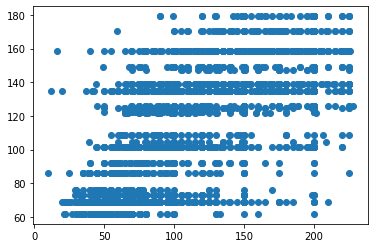

In [244]:
plt.scatter(y_test,dtr_pred)

In [245]:
rid_params={'alpha': [1e-10,1e-8,1e-4,1e-2,10,50,100,200,300,500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
rid_regg=GridSearchCV(ridge, rid_params, cv=cv,scoring='neg_mean_squared_error')
rid_regg.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.01, 10, 50, 100, 200,
                                   300, 500]},
             scoring='neg_mean_squared_error')

In [246]:
rid_regg.best_params_
rid_regg.best_score_

-1345.9651978427837

In [247]:
rid_regg_pred=rid_regg.predict(X_test)

In [248]:
pd.DataFrame({'original test set':y_test, 'predictions': rid_regg_pred})

original test set  predictions
25936                175   162.178966
19991                110   160.763574
38342                220   170.834655
40358                140   150.215441
28374                 53    63.306827
...                  ...          ...
40397                 60    68.513471
35867                 60    67.211810
39166                150   163.676028
4336                  42    63.306827
7376                 151   155.556931

[3226 rows x 2 columns]

In [249]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rid_regg_pred)))

r2: 0.6934738796104674


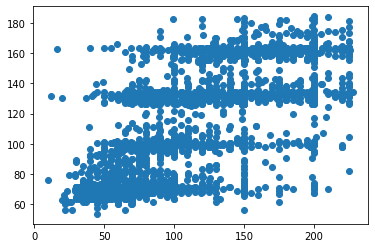

In [250]:
plt.scatter(y_test,rid_regg_pred)